# **N-Body simulation handout 2**: Generating initial conditions for your N-body simultions with the Zeldovich approximation
### *[Delon Shen](https://delonshen.com), November 13, 2024*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Ngrid = 10 ** 4
Np    = 10 ** 5
Lbox  = 10 ** 3 # cMpc / h
aini  = 0.1

# Basic Idea
In the previous handout we have written code to gravitationally evolve a system of $N$ particles in 1+1 dimensions and tested it with a simple plane wave. 
Now our task is to figure out how to set up realistic initial conditions.
In the early universe tiny density perturbations were generated. 
We can use N-body simulations to understand how these initial tiny perturbations from the early universe grow into the structure we see today. 
To generate a realistic initial condition for our N-body simulations we will
1. Generate a realization of the initial density field  
2. Use the Zeldovich approximation to translate that density field into initial conditions for our N-body simulation $\{\tilde x_i, \tilde p_i\}$

In this handout, I will first briefly discuss random fields[1]. 
Random fields are the object we will use to represent the initial tiny density perturbations.
I will then discuss the Zeldovich approximation (ZA) and guide you through generating N-body initial conditions using ZA.
$\newcommand{\r} { {\bf{r}} }\newcommand{\x} { {\bf{x}} }\newcommand{\v} { {\bf{v}} }\newcommand{\u} { {\bf{v}} }\newcommand{\p} { {\bf{p}} }\newcommand{\q} { {\bf{q}} }\newcommand{\s} { {\bf{s}} }\newcommand{\k} { {\bf{k}} }\newcommand{\d} { {\bf{d}} }$

[1]: for more details see [Anthony Challinor's notes](https://cosmologist.info/teaching/EU/ADC_Structure_formation2.pdf) and [Tobias Baldauf's notes](https://doi.org/10.1093/oso/9780198855743.003.0007)

## Exercise 1: Random Fields
A random field $f(\x)$ is field where each point is a random number. 
The probability of a given field configuration we denote as $P[f(\x)]$. 
For simplicitly we will focus our discussion on a zero-mean random field: $\langle f(\x) \rangle = 0$. 
The cosmological principle states that the universe is homogeneous and isotropic. 
So we can demand our cosmological random fields to be 
- **Statistically Isotropic**: Statistics of the rotated field (with associated rotation matrix ${\sf R}$) and original field are identical $$P[{\sf R}f( \x)] = P[f(\x)]$$
- **Statistically Homogeneous**: Statistics of the translated field and original field are identical $$P[f(\x -\d)] = P[f(\x)]$$

Some examples of random fields in cosmology are CMB temperature fluctuations or matter density contrast. 

---
### **Exercise 1.1**: Derive what constraints statistical homogeneity and isotropy imposes on $\langle f(\k) f^*(\k')\rangle$ 
Consider the Fourier transform of a random field $f(\x)$.
$$f(\k) = \int d^3\x\ e^{-i\k\cdot \x} f(\x) \quad\textrm{and}\quad f(\x) = \int \frac{d^3 \k}{(2\pi)^3} e^{i\k\cdot \x} f(\k)$$
Show that if you assume statistical homogeneity and isotropy then the two point function in Fourier space must have the form
$$\langle f(\k) f(\k')\rangle = (2\pi)^3 \delta^{(D)}(\k+\k') P(|\k|) $$
Where $\delta^{(D)}$ is the Dirac-delta function and $P(|\k|)$ is the **power spectrum**. If you are stuck, this calculation is spelled out in Sec. (1.1.1) in [Anthony Challinor's notes](https://cosmologist.info/teaching/EU/ADC_Structure_formation2.pdf). 

---

In real space equivalent of the power spectrum is the **correlation function**
$$\langle f(\x) f(\x+\d)\rangle = \xi(|\d|) .$$
From experimental data we also know that the initial density field are extremley well described by a **gaussian** random field. 
In this case, just like for a regular gaussian random vector, the statistics of the random field are captured by just its mean and 2-pt function. 
In other words, all we need to completley characterize a gaussian random field $f(\x)$ is its correlation function!
What about $f(\k)$? 
First we can split it up into a real and imaginary part
$$f(\k) = a(\k) + i b(\k) $$
It turns out that $a(\k)$ and $b(\k)$ are independent Gaussian random fields with variance $P(k)$!

---
### **Exercise 1.2**: Verify the stated statistics of $a(\k)$ and $b(\k)$ 
Verify that $a(\k)$ and $b(\k)$ are both Gaussian distributed with zero mean and variance $P(k) / 2$ and that $a(\k)$ is independent of $b(\k)$. 

---

So given a power spectrum $P(k)$, we almost have an algorithm to generate a real space random field that obeys power spectrum. 
There is one subtly to discuss in the discrete case.
In a numerical simulation, we can't simulate infinite volume.
Because there is a maximum scale we can resolve, there is a minimum energy Fourier mode we can extract from it, $k_F = 2\pi / L$.
This is important because any Fourier mode we can resolve is a integer multiple of this $k_F$.
This has implications for the connection of the Dirac delta $\delta^{(D)}$, which would appear in the continous case, and the Kronecker delta $\delta^{(K)}$, which appears in any realistic case. 
Namely in 1 spatial dimension
$$\delta^{(D)}(k_i - k_j )  = \delta^{(D)}((i-j)k_F) = \frac 1 {k_F}\delta{(D)}(i-j) = \frac{ L}{2\pi} \delta^{(K)}_{i,j} $$
Recall that 
$$\langle f(k) f(k')\rangle = (2\pi) \delta^{(D)}(k+k') P(k)\xrightarrow{\rm discrete}  \delta^{(K)}\times L\times P(k)$$
This means that an algorithm to generate a real space random field with some length $L$ that obeys power spectrum is 
$$ 
f(x_g) = \frac 1 N \sum_{\ell=0}^{n-1} [a(k_\ell) + i b(k_\ell)]\times {\rm exp}\left\{2\pi i \frac{g\ell}{n} \right\} \qquad a(k_\ell),b(k_\ell) \sim \mathcal N(0, N_{\rm grid} P(k_\ell) / 2)\textrm{ where } a(k_\ell)\perp b(k_\ell)
$$
where $g$ and $\ell$ index the discrete position $x$ and momenta $p$.

## Exercise 1.3: Generate a 1+1D Gaussian random field with a with a realisitc power spectrum
Generate a random field with a power spectrum (motivated by Eq. (2.2) and the caption of Fig. 2 of of [McQuinnWhite15](https://arxiv.org/abs/1502.07389))
$$\frac k \pi P_{1d}(k;z) =\Delta(k;z) \qquad \Delta(k;z) = \frac{k^3}{2\pi^2}P_{\rm CDM}(k;z) \times {\rm exp}(-5 k^2)$$
where $P_{\rm CDM}$ is computed in your favorite cosmology code (CAMB, CLASS, etc.) and $\Delta$ is the dimensionless power spectrum. The exponential damping is for visualization in this notebook, when you run you full N-body simulation this damping can be removed.
Let $a = 0.01$.

(0.0, 100.0)

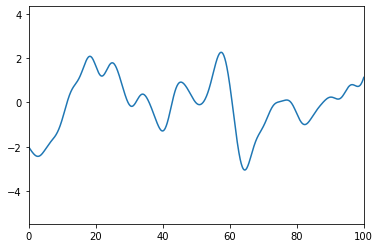

In [3]:
k_ell = 2 * np.pi * np.fft.rfftfreq(Ngrid)    # in code units

### getting power spectrum from CAMB
import camb
from camb import model, initialpower
from scipy.interpolate import interp1d

pars =  camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, ns=0.965)
pars.set_matter_power(redshifts=[1/aini - 1], kmax=2.0)
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
# kh in units h / Mpc
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 1000)
f_logpk = interp1d(x = np.log(kh), y = np.log(pk[0, :]), fill_value='extrapolate')
####################################

def f_pk(kCode):
    k = kCode * Ngrid / Lbox # convert code units to h / cMpc units
    dimensionless_P3D = np.abs(k)**3 / (2 * np.pi ** 2) * np.exp(f_logpk(np.log(np.abs(k)))) * np.exp(-5 * k ** 2)
    dimensionless_P1D = dimensionless_P3D
    P1D_code = dimensionless_P1D * np.pi / np.abs(kCode)
    return P1D_code * Ngrid # Ngrid factor is discrete correction

P_k = np.zeros_like(k_ell) 
idxs = np.where(k_ell != 0)
P_k[idxs] = f_pk(k_ell[idxs])

np.random.seed(42)
a_k = np.array([np.random.normal(scale = np.sqrt(p / 2)) for p in P_k])
b_k = np.array([np.random.normal(scale = np.sqrt(p / 2)) for p in P_k])
f_k = a_k + 1j*b_k

f_x = np.fft.irfft(f_k)
x   = np.linspace(0, 1, Ngrid) # in code units
x_mpc_h = x * Lbox             # in cMpc/h units

plt.plot(x_mpc_h, f_x / aini )
plt.xlim(0, 100)

## Exercsie 1.4: Measure the power spectrum 
Read section 7.6 of [Tobias Baldauf's notes](https://academic.oup.com/book/44246/chapter/372565490?login=true) on measuring the power spectrum and the variance of this estimator. Then implement this estimator by measuring the power spectrum in some momentum bins from the initial conditions you generated. Compare your measured power spectrum to the theoretical power spectrum you endowed your initial conditions with.

In [4]:
def bin_curve(f, k, bin_edges):
    binned_f     = np.zeros(len(bin_edges) - 1)
    binned_f_std = np.zeros(len(bin_edges) - 1)

    for i, (left, right) in enumerate(zip(bin_edges, bin_edges[1:])):
        idxs = np.argwhere((np.abs(k) > left) & (np.abs(k) < right))
        Nmodes = len(idxs)
        binned_f[i] = np.mean(f[idxs])
        if(Nmodes != 0):
            binned_f_std[i] = np.sqrt(2 / Nmodes) * binned_f[i]     
    return binned_f, binned_f_std

def measure_power(f_k, k, bin_edges, f_theory):
    ffstar = (f_k * np.conj(f_k)).real
    bin_means = [np.sqrt(a*b) for (a,b) in zip(bin_edges, bin_edges[1:])]

    binned_ffstar, binned_ffstar_std = bin_curve(ffstar, k, bin_edges)
    
    
    theory_k = np.logspace(np.log10(np.min(bin_edges)), np.log10(np.max(bin_edges)), 100000)
    theory_Pk = f_theory(theory_k)
    binned_theory, _ = bin_curve(theory_Pk, theory_k, bin_edges)


    plt.figure(dpi = 300)
    plt.step(bin_edges, np.append(binned_ffstar, [binned_ffstar[-1]], ), 
             where='post', label=r'Measured $P(k)$', c='r')
    plt.errorbar(bin_means, binned_ffstar, yerr = binned_ffstar_std, c='r', marker='x', ls='none')

    plt.step(bin_edges, np.append(binned_theory, [binned_theory[-1]], ), 
             where='post', label=r'Binned Theory $P(k)$', c='k', ls='--', lw=0.8)

    plt.xscale('log')
#     plt.yscale('log')
    plt.ylabel('P(k)')
    plt.legend(frameon = False)
    plt.xlabel('k')

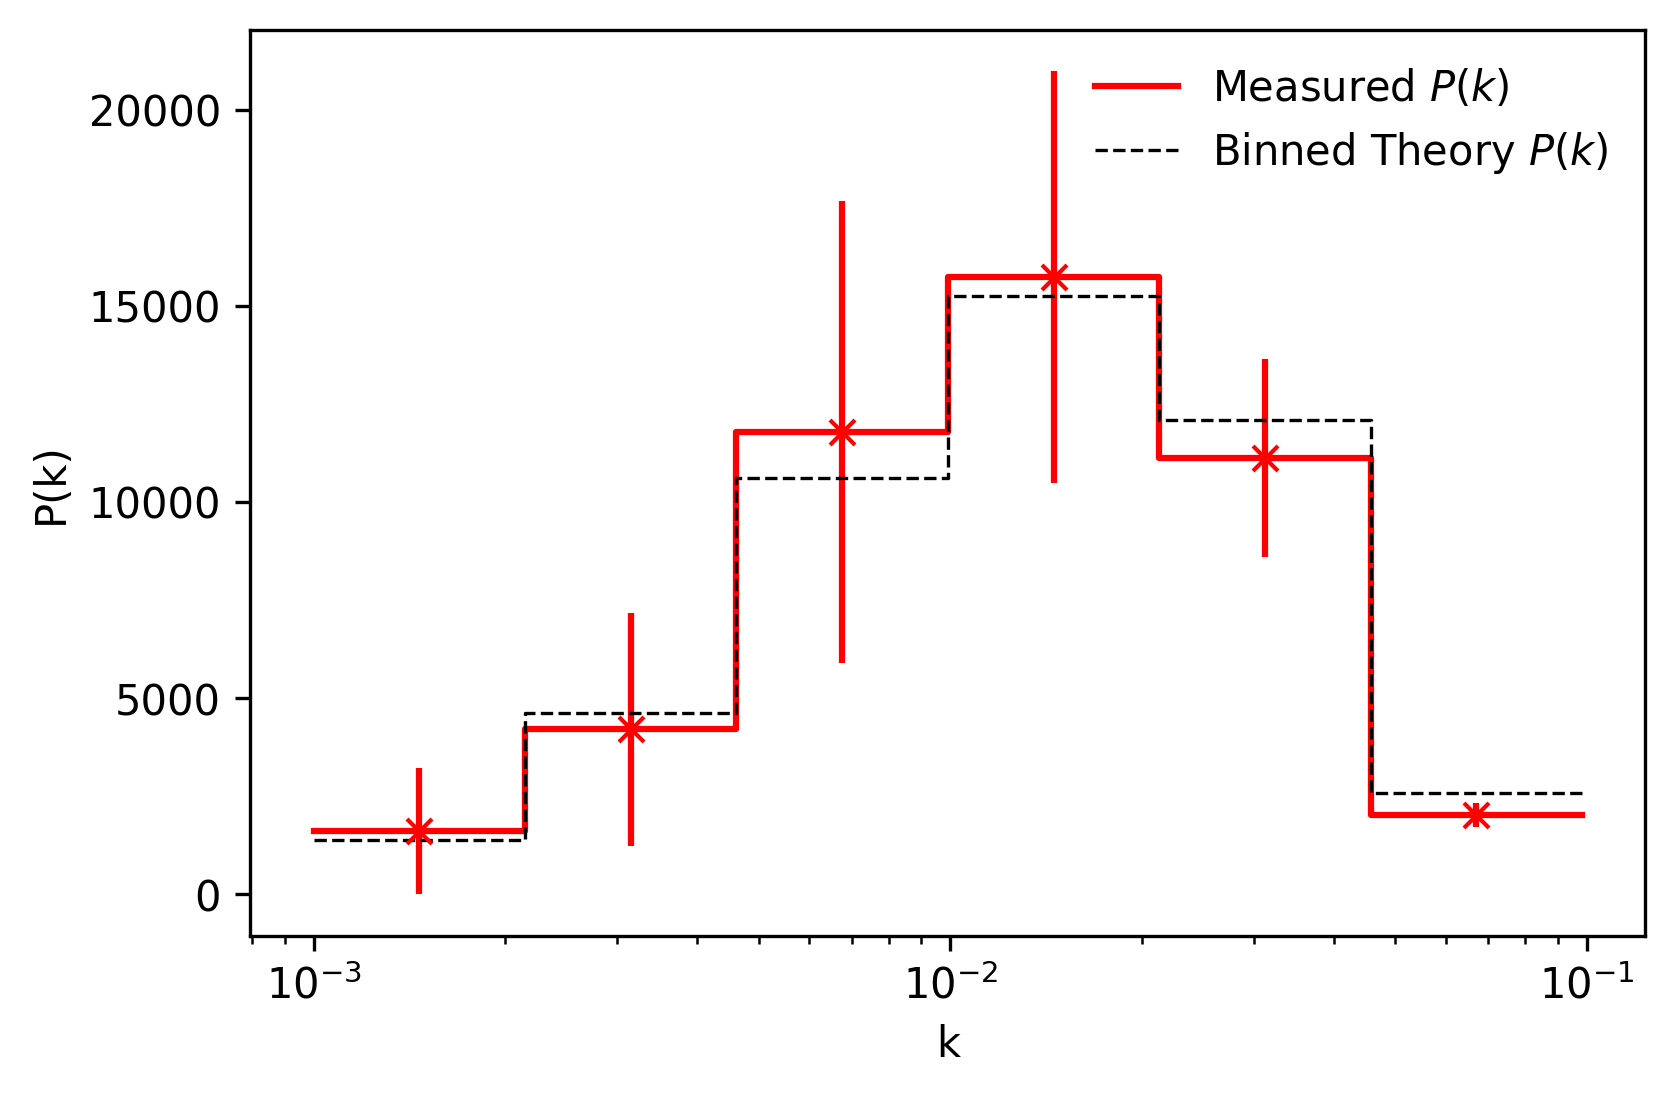

In [5]:
bin_edges = np.logspace(-3, np.log10(np.pi/32), 7)
measure_power(f_k, k_ell, bin_edges, f_theory = f_pk)

## Exercise 2: The Zeldovich Approximation 
When talking about fluids there are usually two views we can take. 
Consider the ocean. 
One view you can take is as a person on the beach looking at the ocean. 
In this case the fluid (ocean) can be thought of as a field full of fluctuations. 
This is called the Eulerian frame.
You can take the other view by pretending you are a water molecule in the ocean.
In this case you're constantly getting pulled around by waves and tides and so on.
This is called the Lagrangian frame.
It is arguably the more violent frame.
The Zeldovich approximation is done from the Lagrangian frame. 

Formally the Zeldovich approximation is this.
We want to determine how an individual fluid element evolves from their inital position $\q$ to some final position $\x(\q, a)$. 
    $$\x(\q,a) = \q + \s(\q, a) \tag{1}$$
Lets return to the system of equations we used to numerically evolve our N-body system in the previous handout.
$${\frac{d\tilde \x}{da} = \frac{\tilde \p}{ a^{3/2}}\qquad \frac{d\tilde \p}{da} = - \sqrt{a} \tilde\nabla \tilde \phi \qquad \tilde\nabla^2 \tilde \phi = \frac 3 {2a} \tilde \delta \qquad \textrm{where } \tilde \nabla = \partial /\partial \tilde x_i \textrm{ and }\tilde \delta = \tilde \rho - 1}\tag{2}$$

---
### **Exercise 2.1:** Derive a relation between $\tilde\s$ and $\tilde \delta$
Use Eq.(1) and Eq.(2) to derive a relation between the displacement vector $\s$ and density contrast $\tilde \delta$
$$\tilde\nabla\cdot \left(\frac{d^2 \tilde \s}{da^2} + \frac3 {2a} \frac{d\tilde \s}{da}\right)  = - \frac 3 {2a^2}\tilde\delta$$

---

Both $\tilde \nabla$ and $\delta$ are Eulerian quantities. We can do a little more work to rewrite things in terms of Lagrangian quantities only.
(Slipping into index notation). 
First we can assert mass conservation meaning
$$d^3 \tilde q = \tilde \rho(\x) d^3 \tilde x \Rightarrow J^{-1}\equiv  \left| \frac{\partial \tilde x_i}{\partial \tilde q_j}\right|^{-1} = 1 + \tilde\delta(\x)$$
The determinant we can evaluate directly using Eq. (1)
$$J=\left| \frac{ \partial \tilde x_i}  { \partial \tilde q_j }  \right| = {\rm det} \left[ \delta_{ij} + \frac{ \partial \tilde s_i}  { \partial \tilde q_j }  \right]$$
Using this we can find a relation between $\tilde \delta$ and $\s$
$$\tilde\delta(\x) = 1+\frac{1}{{\rm det} \left[ \delta_{ij} + \frac{ \partial s_i}  { \partial \tilde q_j }  \right]}$$
Similarly we can find a relation between derivatives with respect to $\tilde x$ and derivatives with respect to $\tilde q$
$$\frac{ \partial }  { \partial \tilde x_i }  = \frac{ \partial \tilde q_j}  { \partial \tilde x_i } \frac{ \partial }  { \partial \tilde q_j }  = \left(\delta_{ij} +\frac{ \partial \tilde s_i}  { \partial \tilde q_j } \right)^{-1} \frac{ \partial }  { \partial \tilde q_j }. $$
Using all this allows us to rewrite the relation you derived above between $\s$ and $\tilde \delta$ as
$$\left(\delta_{ij} +\frac{ \partial \tilde s_i}  { \partial \tilde q_j } \right)^{-1} \frac{ \partial }  { \partial \tilde q_j } \left( \frac{ d ^2 \tilde s_i } { d a^2 }  + \frac{3}{2a} \frac{ d \tilde s_i} { d  a}  \right)= - \frac{3}{2a^2}(J^{-1} - 1)$$
We can linearize the above equation to first order in the perturbation $\tilde \s$ using the matrix identity 
$${\rm det} \left[ \delta_{ij} + \epsilon A_{ij} \right] = 1 +  \epsilon A_{ii} + O(\epsilon^2).$$
This gives us
$$\frac{ \partial }  { \partial \tilde q_i }  \left( \frac{ d ^2 \tilde s_i } { d a^2 } + \frac{3}{2a}\frac{ d \tilde s_i } { d a }  \right) = \frac{3}{2a^2} \frac{ \partial \tilde s_i}  { \partial \tilde q_i } $$
Wow! A classic second order homogeneous differential equation. If you dig out your old math textbook you will find that general solution in fourier space 
$$\tilde \s(\k, a) = a \tilde\s_+(\k, a_{\rm ini} ) + a^{-3 / 2} \tilde\s_-(\k, a_{\rm ini} ).$$
We can discard the decaying mode and keep only the growing mode that goes $\propto a$.
The question now is how do we figure out $\tilde\s_+(\k, a_{\rm ini} )$. When you study standard perturbation theory you will derive at linear order that[2] 
$$\frac{ \partial \delta}  { \partial t } = -\frac{1}{a}\nabla\cdot \v$$
We can use the fact that $\v = a (\partial \x / \partial t) = a (\partial \s /\partial t)$ telling us that $-i\k\cdot \s(\k,a) = \delta(\k, a)\Rightarrow -k^2 \s = -i\k \delta(\k, a)$. So all together
$$\boxed{\tilde \x(\tilde \q, a) = \tilde \q + \tilde \s(\tilde \q, a) \qquad \tilde \s(\tilde \q, a) = \frac 1 {L_{\rm box, comoving}}\times\frac a{a_{\rm ini}}\times \frac{1}{N}\sum_\k e^{ i\tilde \k \cdot \tilde \q} \times  \frac{i\k}{k^2} \tilde\delta (\k, a_{\rm ini}) }$$
The physical interpretation of this is interesting: fluid elements only travel in straight lines and the direction they travel is set by the initial density perturbation.
Similarly the initial momenta 
$$\boxed{\tilde \p = a \frac{\v}{v_0} = a \frac{\dot x}{r_0/t_0} = a \dot{\tilde x} \times \frac 1 {H_0} = a (a \dot{\tilde \x}) = a^2 \times \frac 1 {L_{\rm box, comoving}}\times\frac {1}{a_{\rm ini}\sqrt{a}}\times \frac{1}{N}\sum_\k e^{ i\tilde \k \cdot \tilde \q} \times  \frac{i\k}{k^2} \tilde\delta (\k, a_{\rm ini}) }$$

[2]: you can actually simplify the derivation a lot by also taking the linear theory solution for $\delta$ wholesale at this point and skip most of the previous steps.

In [6]:
k_ell = 2 * np.pi * np.fft.rfftfreq(Ngrid)    # in code units

P_k = np.zeros_like(k_ell) 
idxs = np.where(k_ell != 0)
P_k[idxs] = f_pk(k_ell[idxs])

np.random.seed(108)
a_k = np.array([np.random.normal(scale = np.sqrt(p / 2)) for p in P_k])
b_k = np.array([np.random.normal(scale = np.sqrt(p / 2)) for p in P_k])
delta_k = a_k + 1j*b_k

f_k = np.zeros_like(delta_k)
f_k[1:] = 1j/(k_ell[1:] * Ngrid / Lbox) * delta_k[1:]
_s_q = np.fft.irfft(f_k)

def s_q(a):
    return np.linspace(0,1, Ngrid), (1/Lbox * a/aini * _s_q)


q_ini, s_q_ini = s_q(aini)
f_s_q_ini = interp1d(q_ini, s_q_ini)

_, s_q_ini_for_p = s_q(1/np.sqrt(aini))
f_s_q_ini_for_p = interp1d(q_ini, s_q_ini_for_p)

# Capstone: Run a realistic 1+1D Cosmological N-body simulation
In the last handout we wrote code to gravitationally evolve our dark matter system. 
In this handout we have written code to generate initial conditions for this system that represent realistic cosmology.
Now put it all together to run a realistic 1+1D Cosmological N-body simulation.
Basically see if you can recreate the blue line in Fig. 2 of of [McQuinnWhite15](https://arxiv.org/abs/1502.07389).

In [7]:
from nbody_lib import * #importing code we wrote in handout 1

# parameters for simulation
da = 0.0001
afinal = 1.0011
N_steps = int((afinal - aini) // da)


# ICs
q = np.linspace(0,1, Np) # uniform in Lagrangian space

x = q + f_s_q_ini(q)
x = array_periodic_boundary(x)

p = aini**2 * f_s_q_ini_for_p(q)

curr_a = aini

  0%|          | 0/9011 [00:00<?, ?it/s]

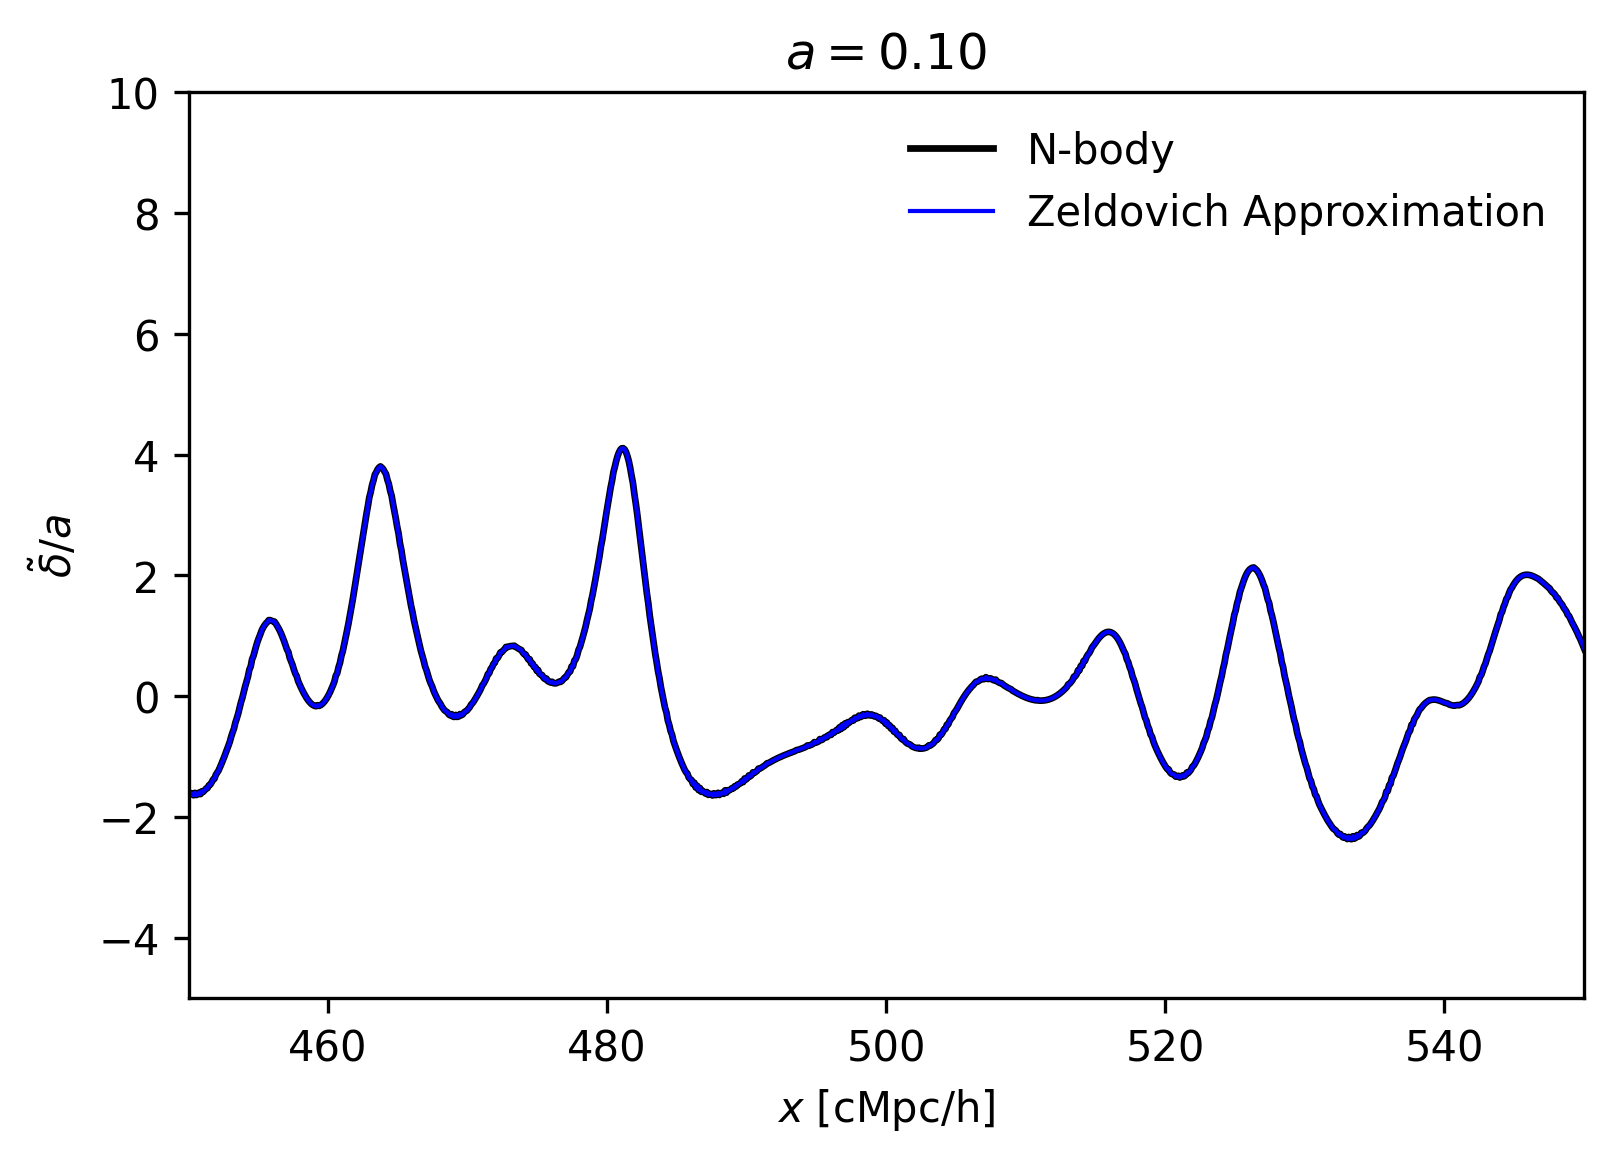

 11%|█         | 995/9011 [00:05<00:38, 208.44it/s]

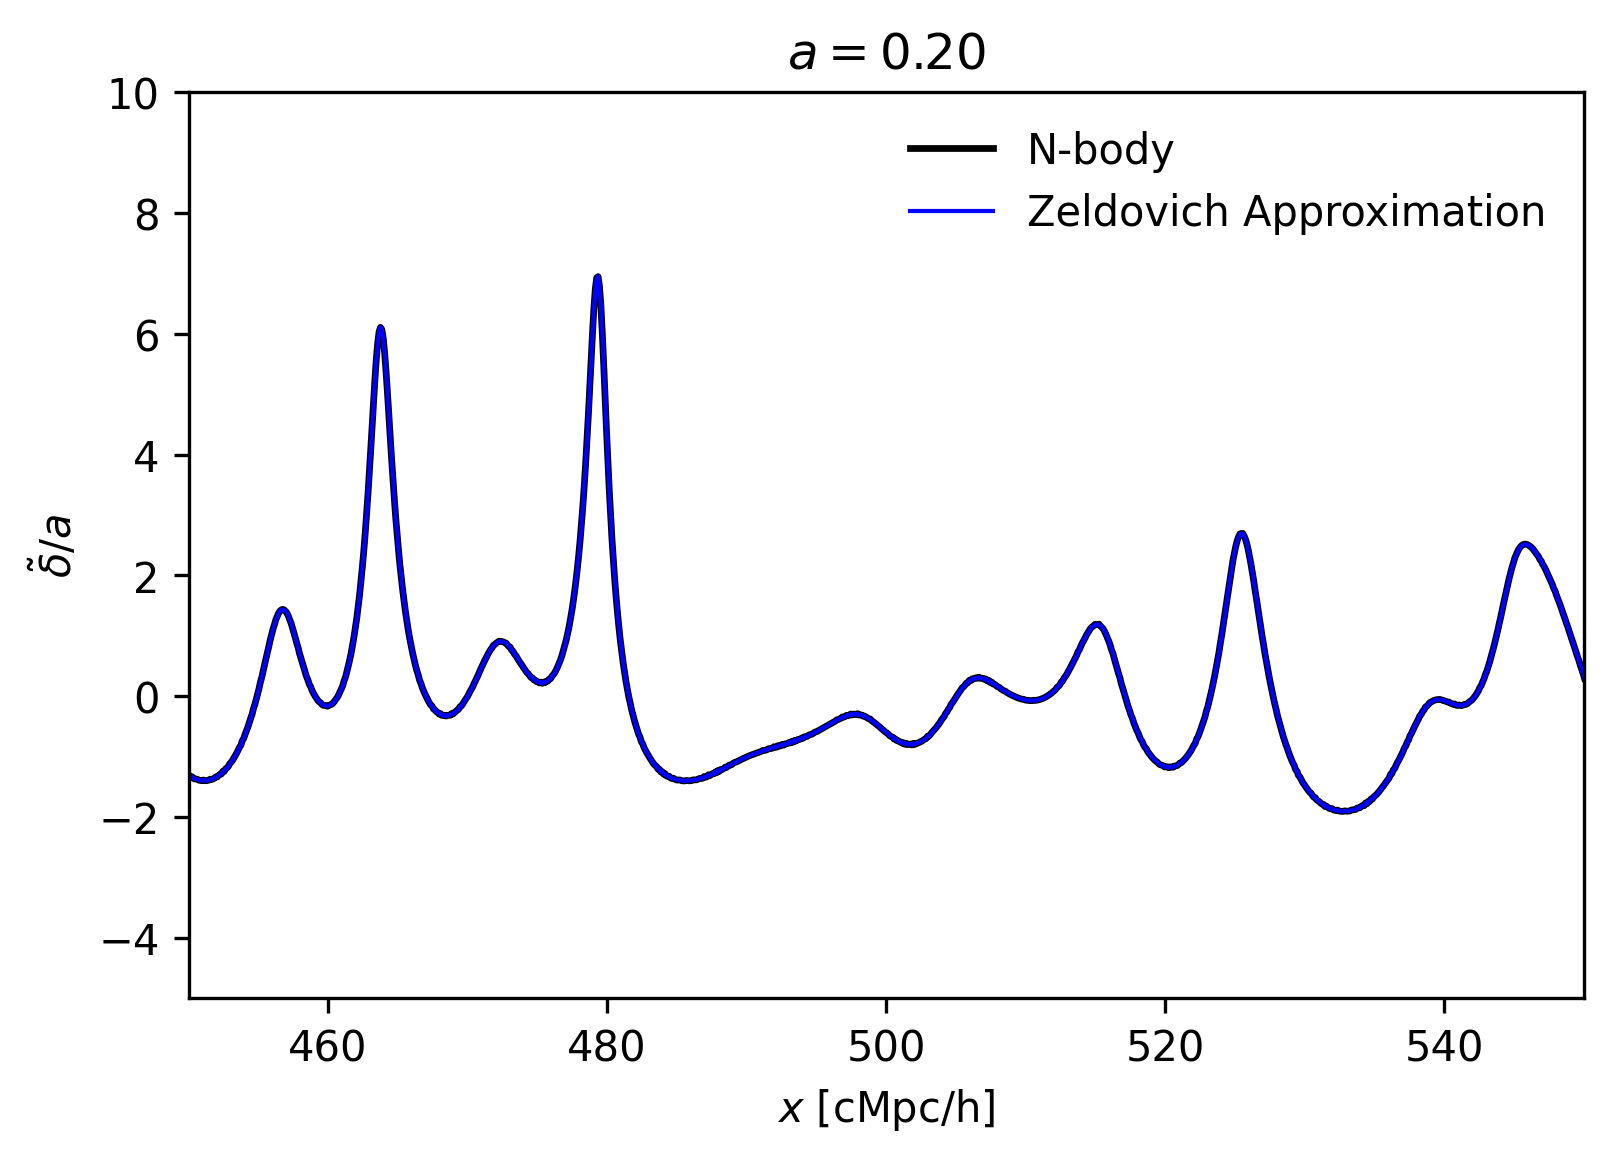

 22%|██▏       | 1982/9011 [00:10<00:33, 207.24it/s]

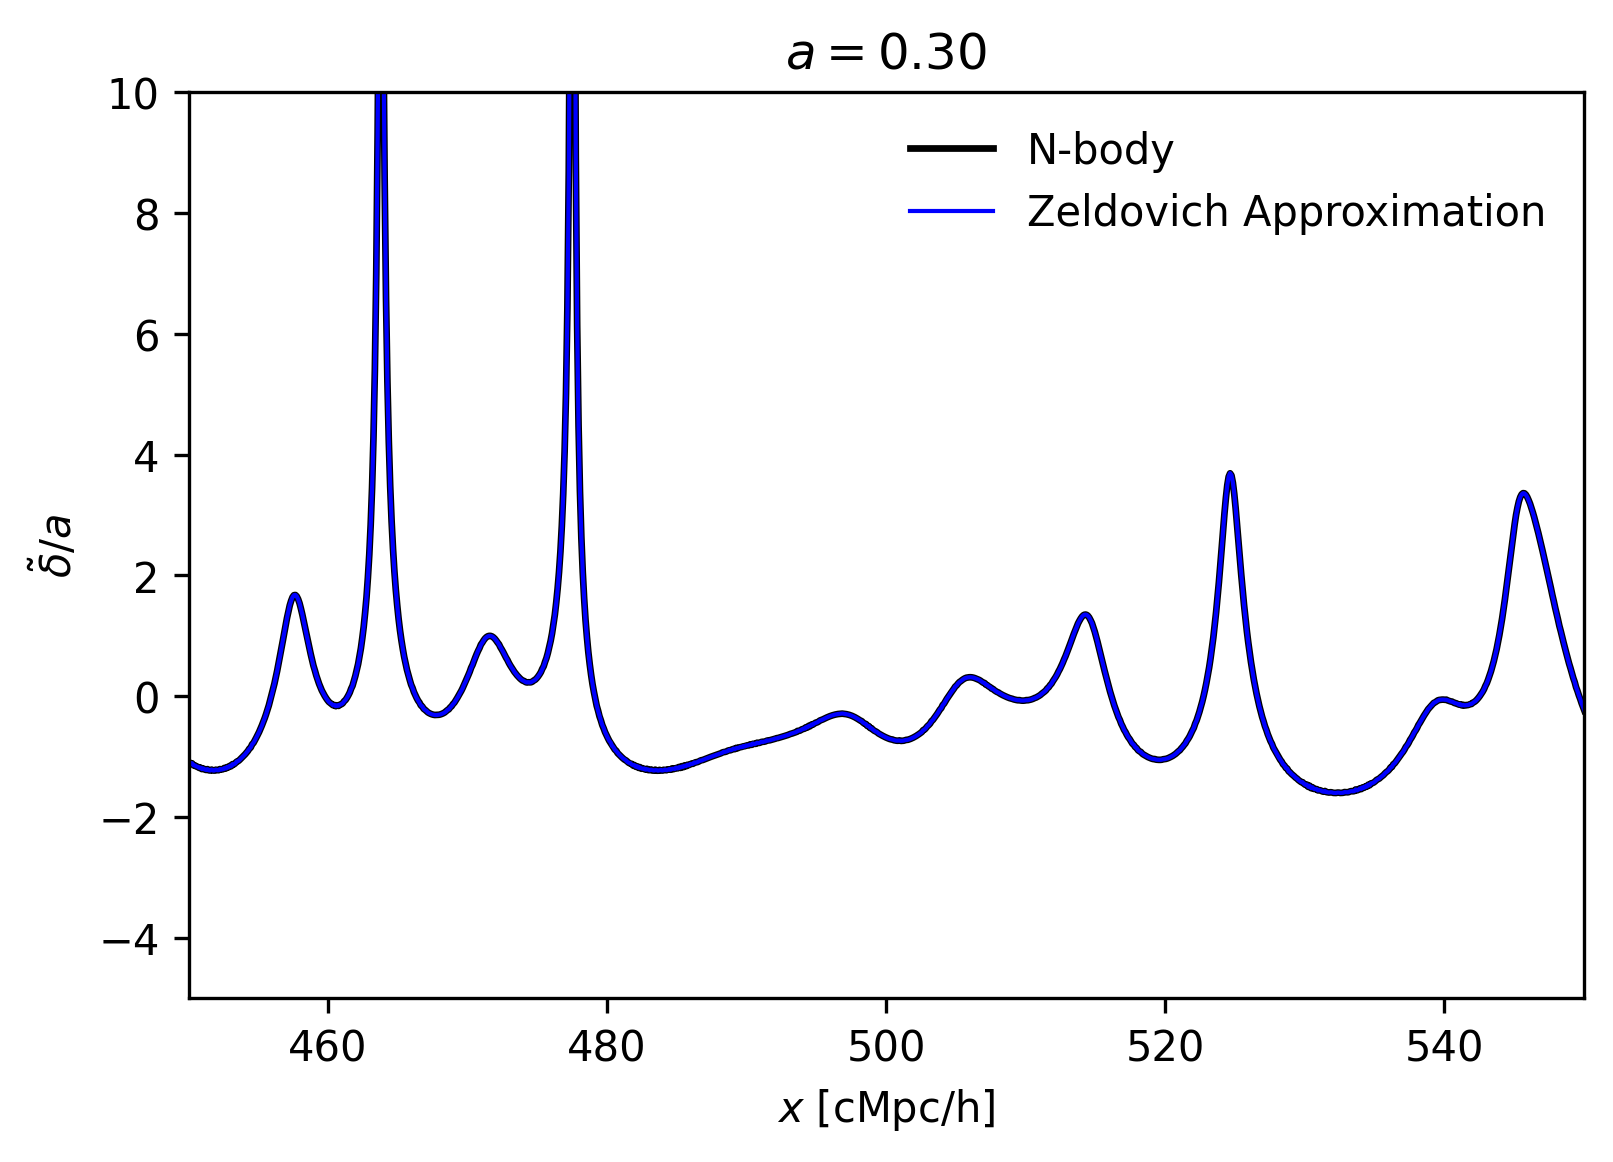

 33%|███▎      | 2990/9011 [00:15<00:29, 206.50it/s]

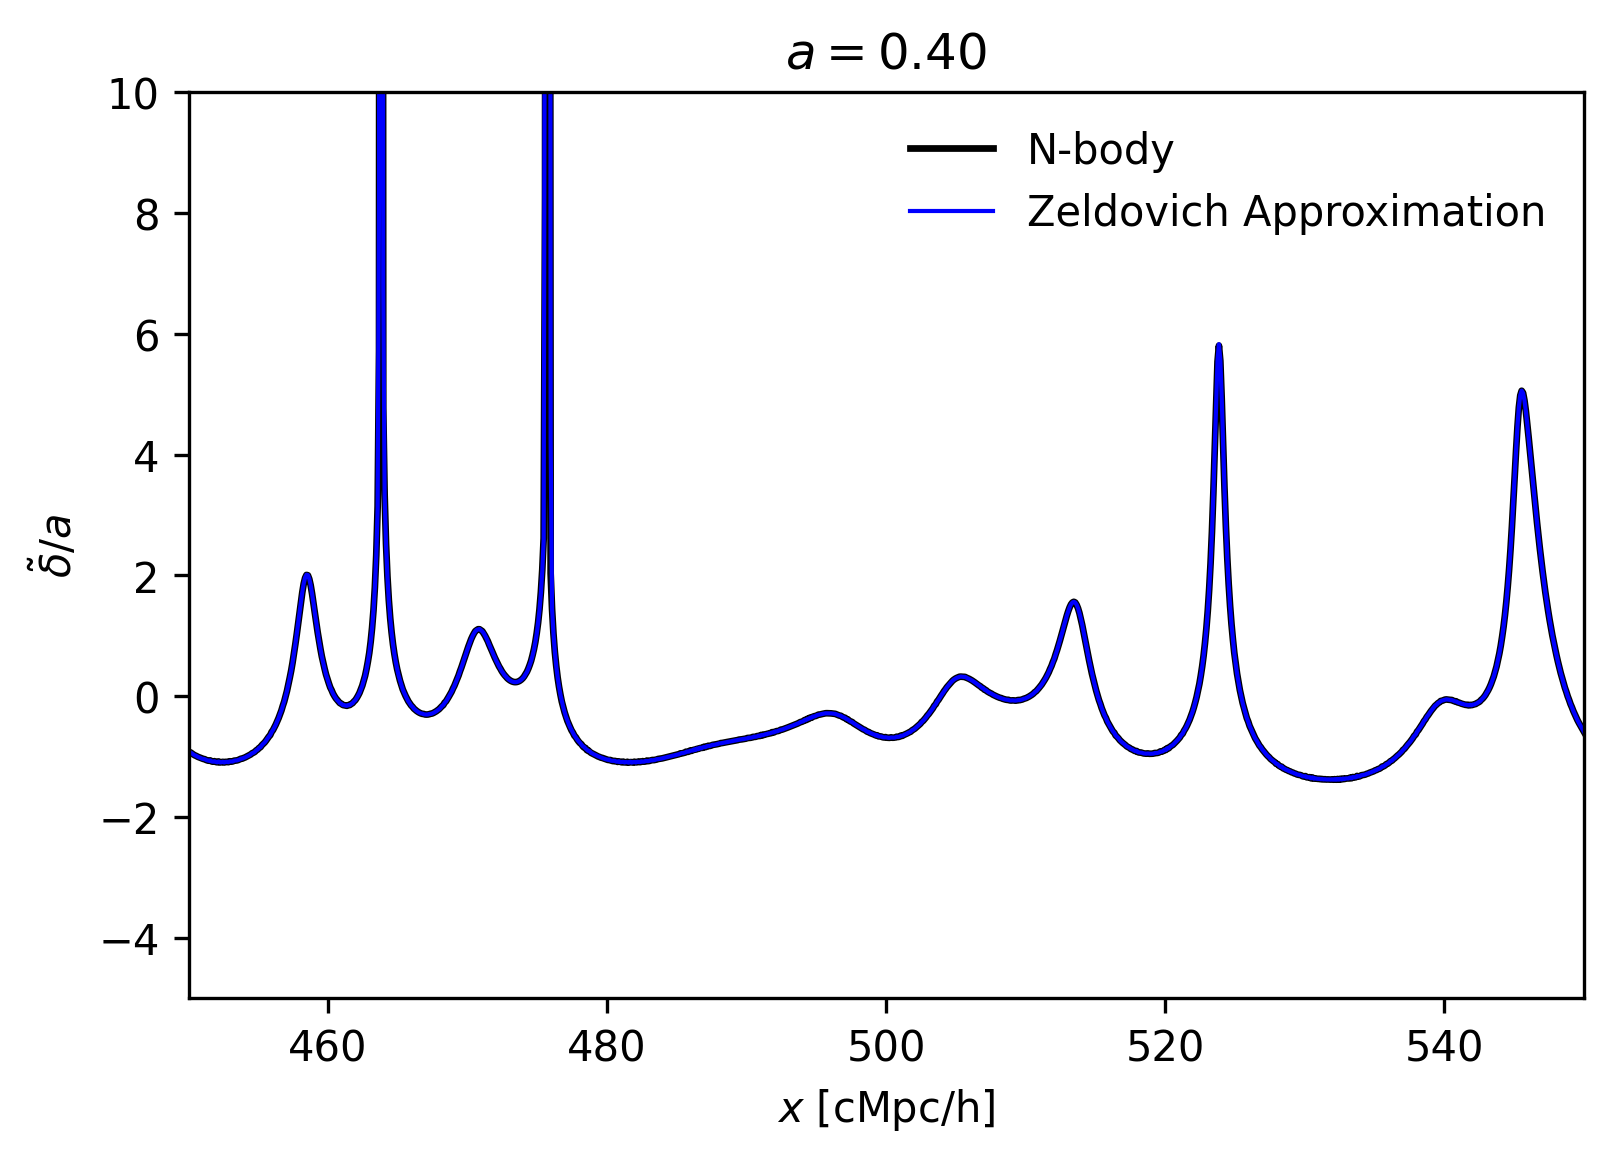

 44%|████▍     | 3998/9011 [00:20<00:24, 206.33it/s]

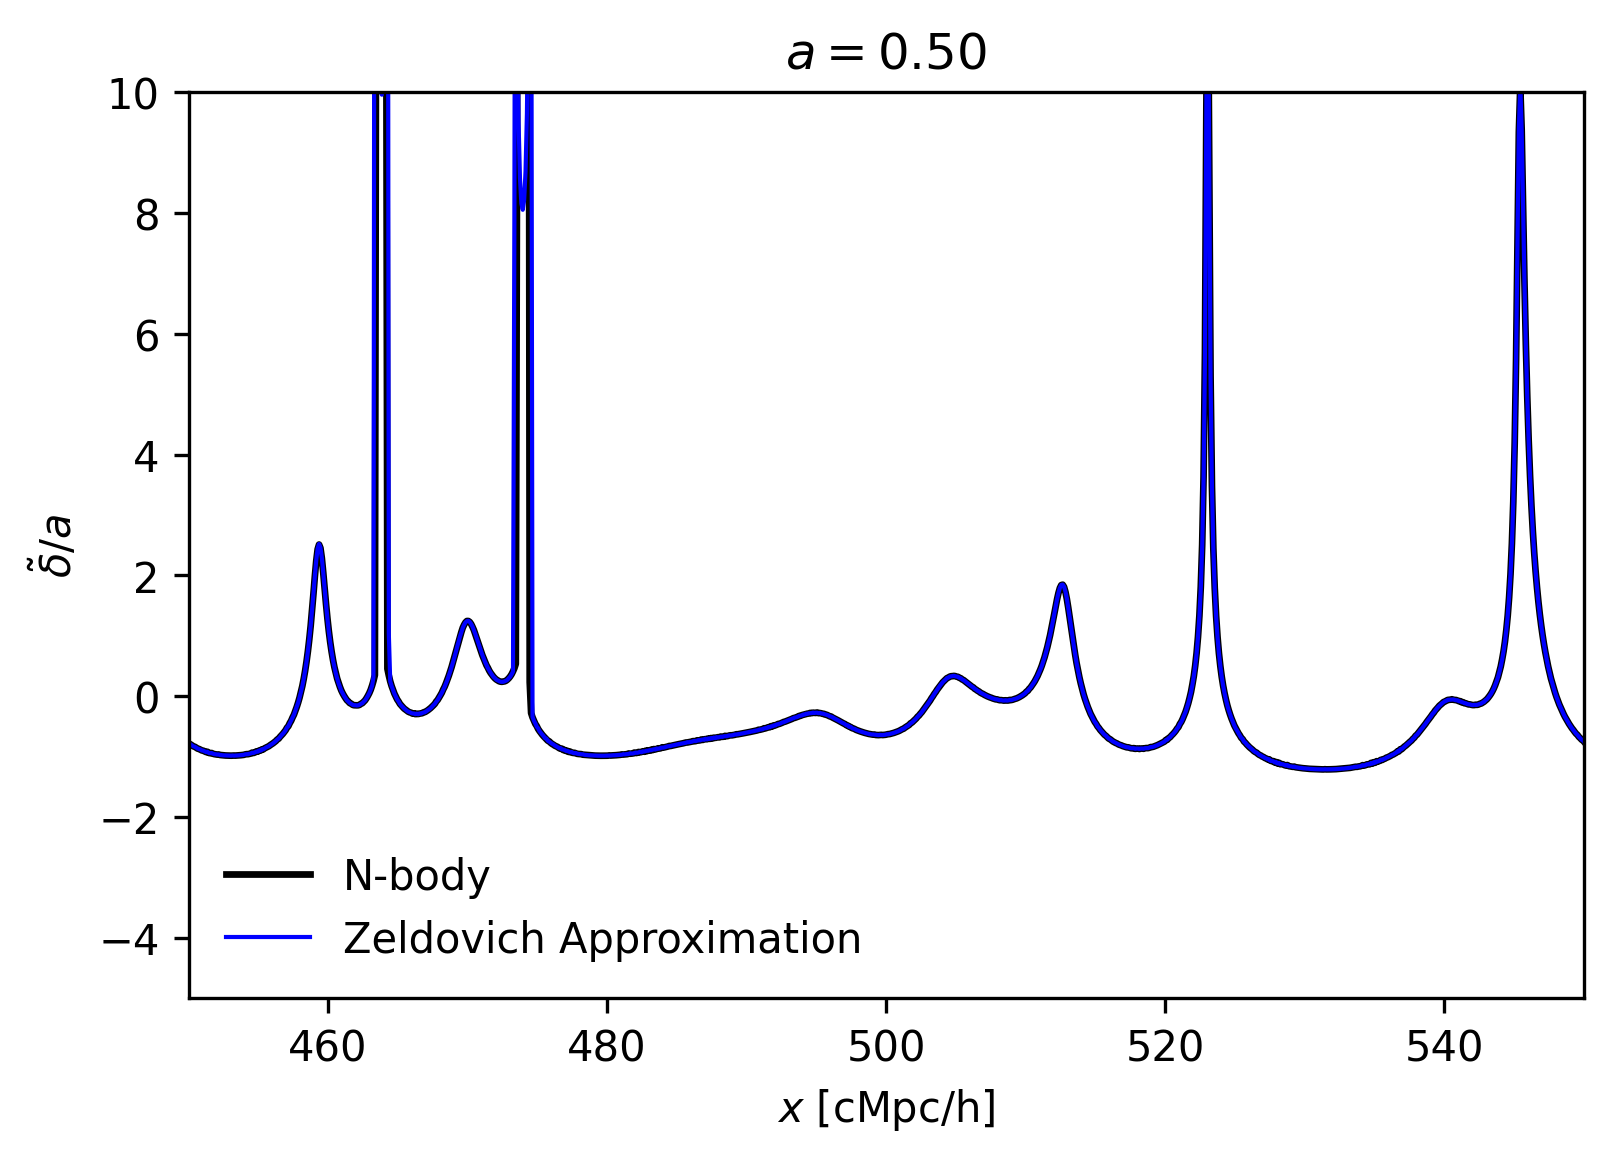

 55%|█████▌    | 4985/9011 [00:25<00:19, 205.65it/s]

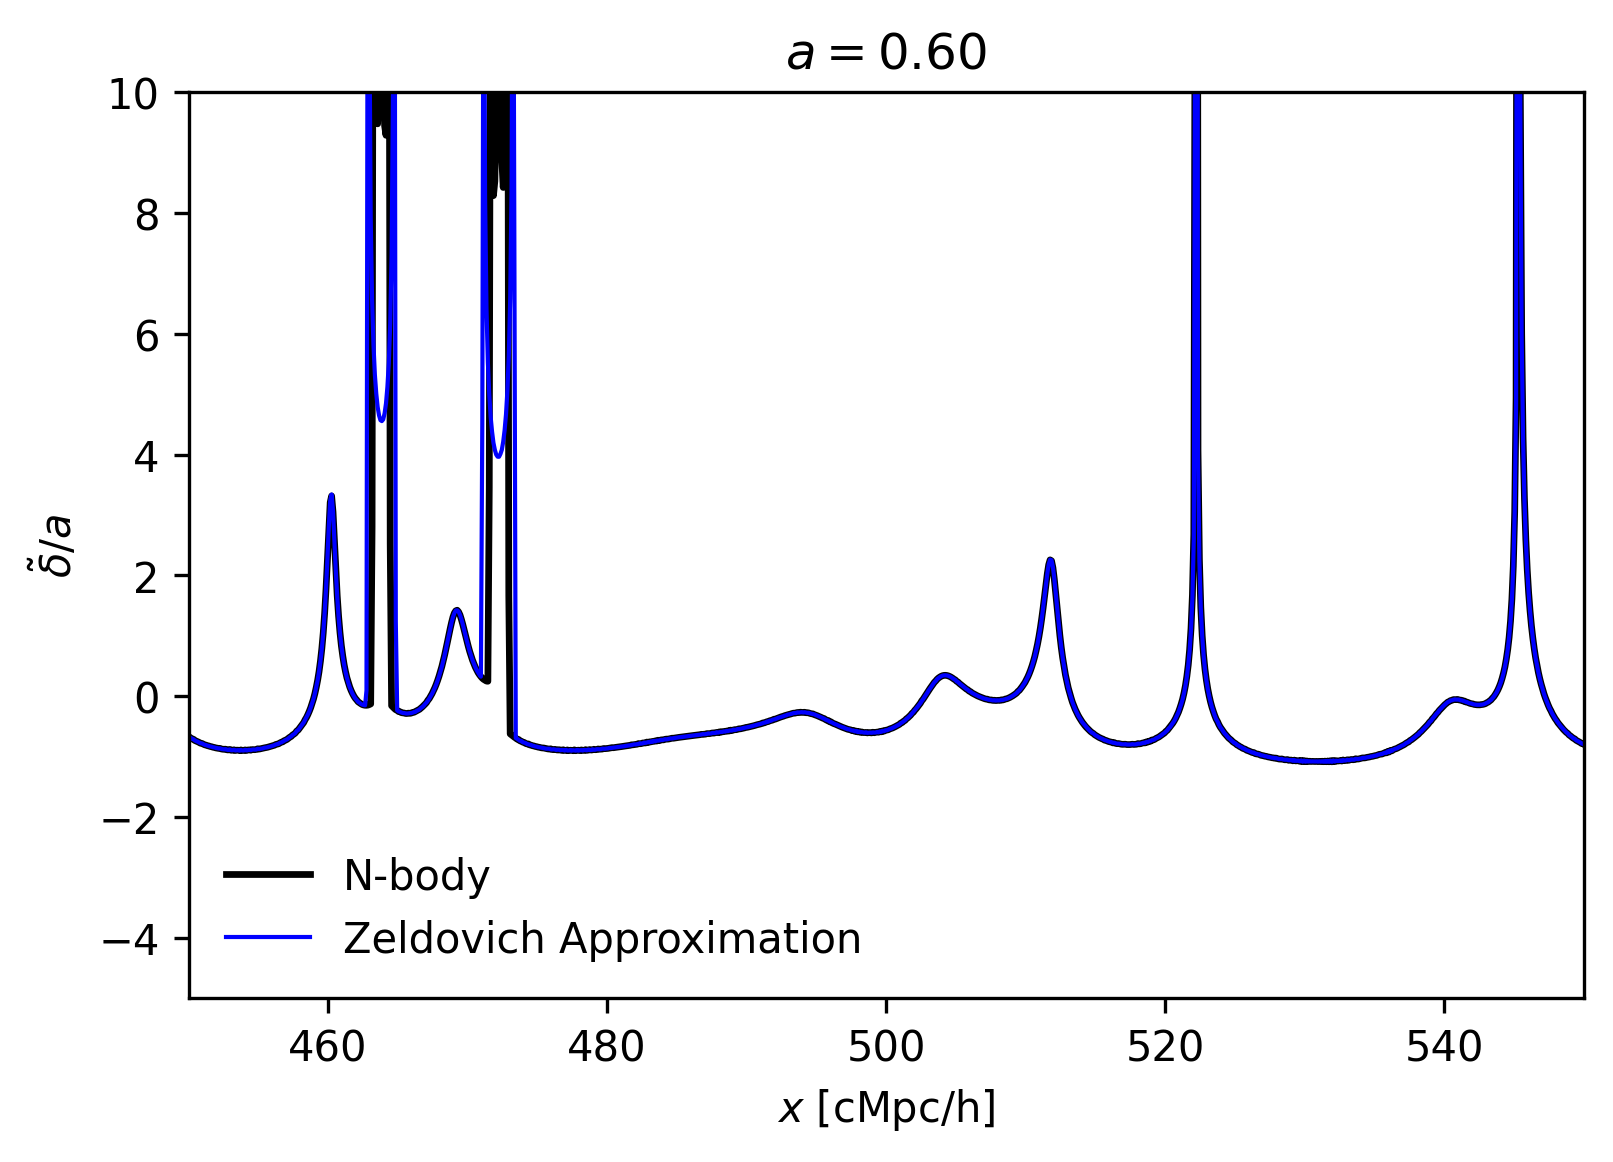

 67%|██████▋   | 5993/9011 [00:30<00:14, 204.75it/s]

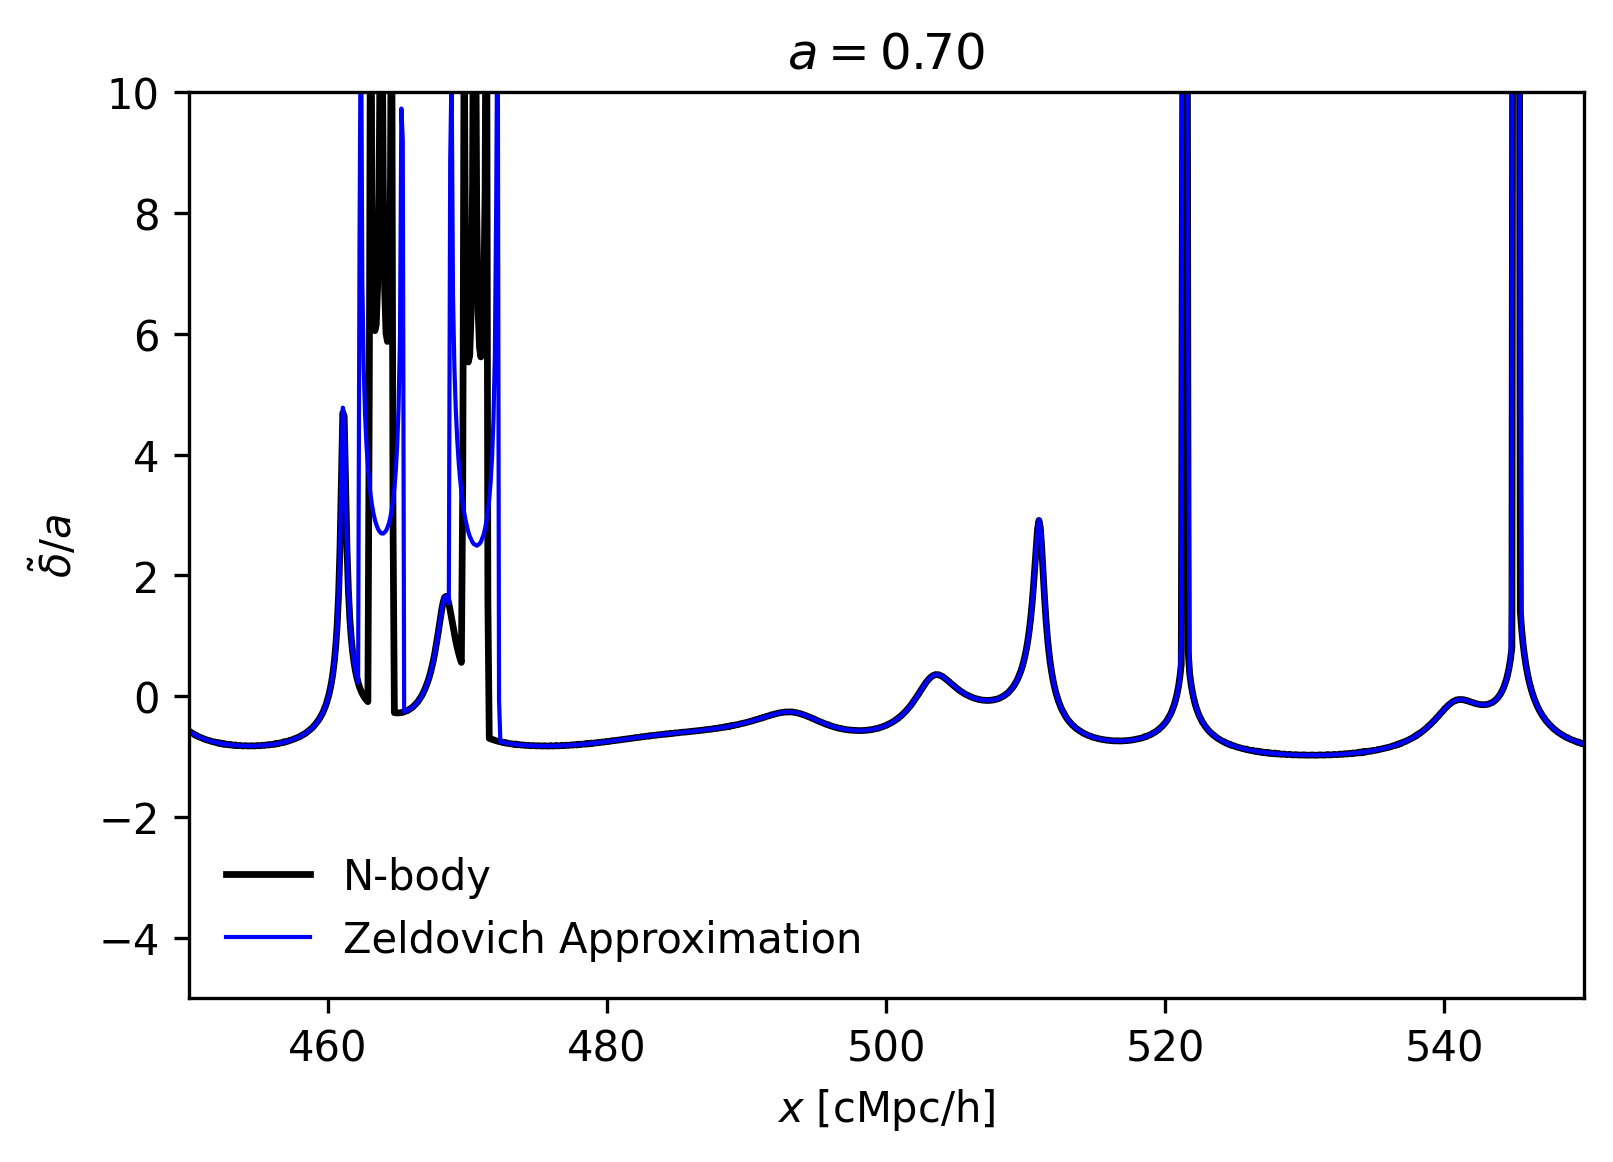

 78%|███████▊  | 7000/9011 [00:35<00:09, 202.28it/s]

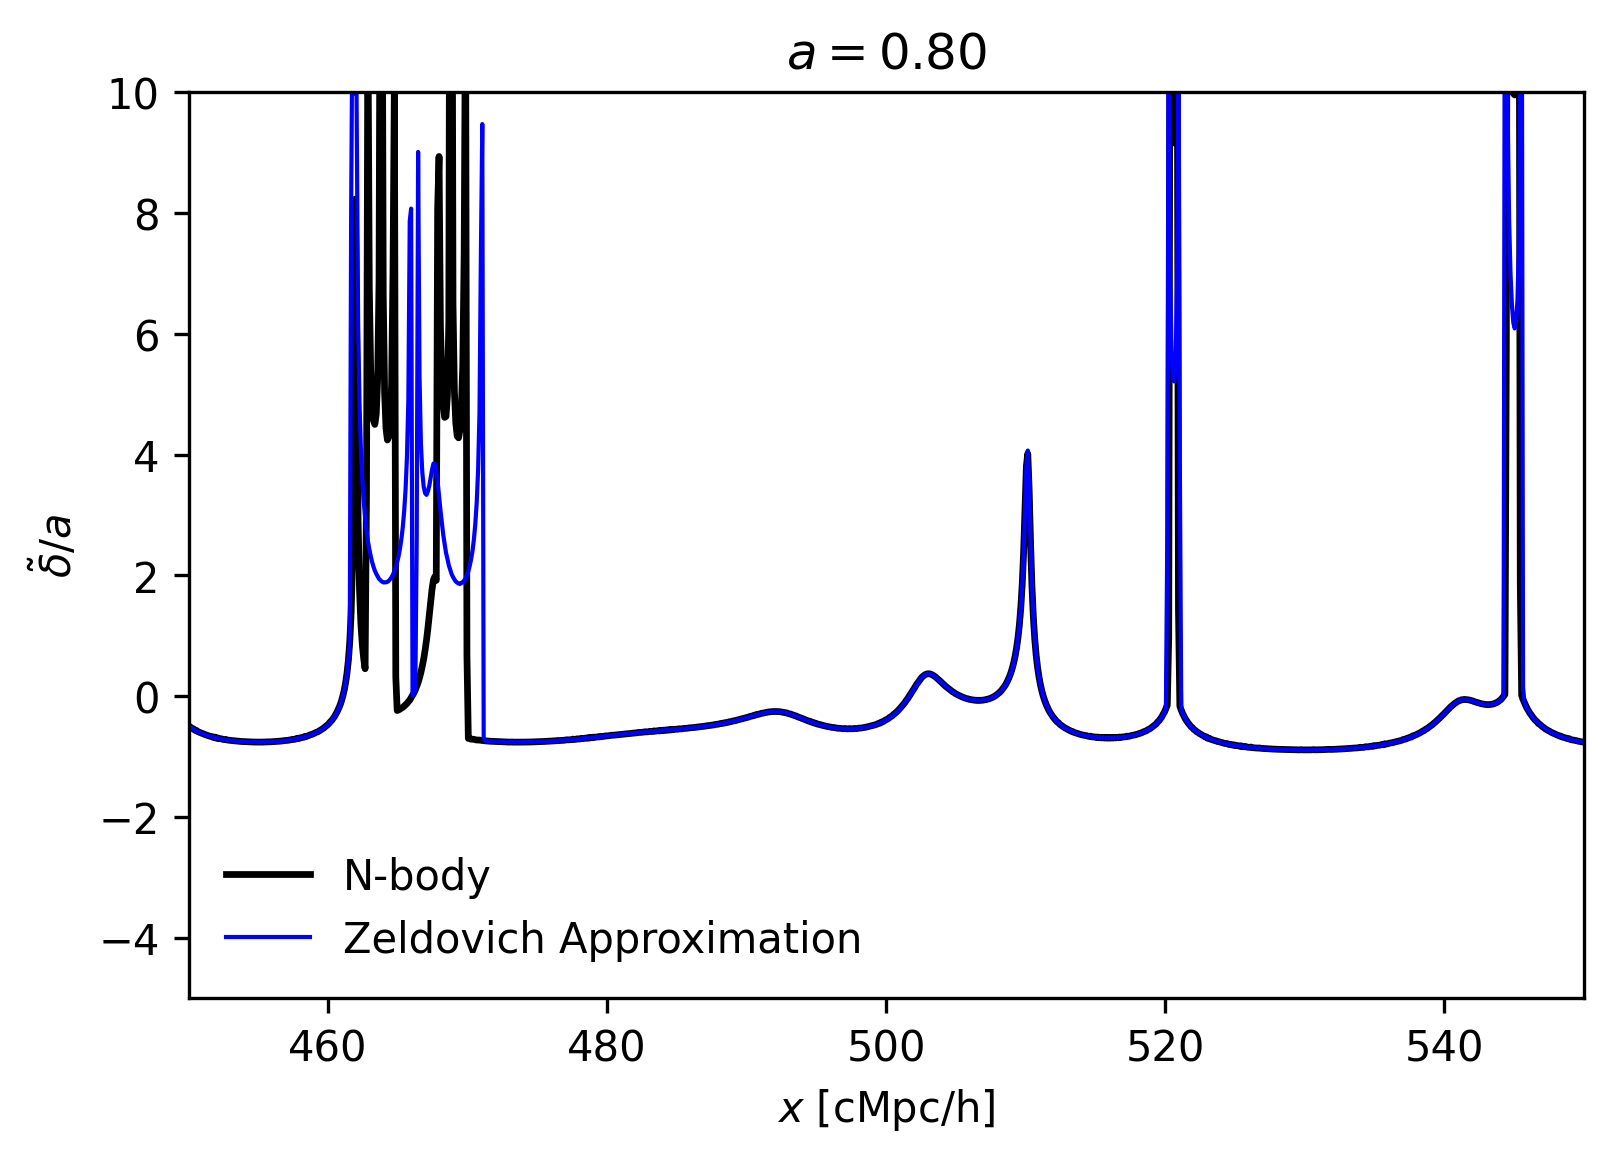

 89%|████████▊ | 7987/9011 [00:40<00:05, 202.65it/s]

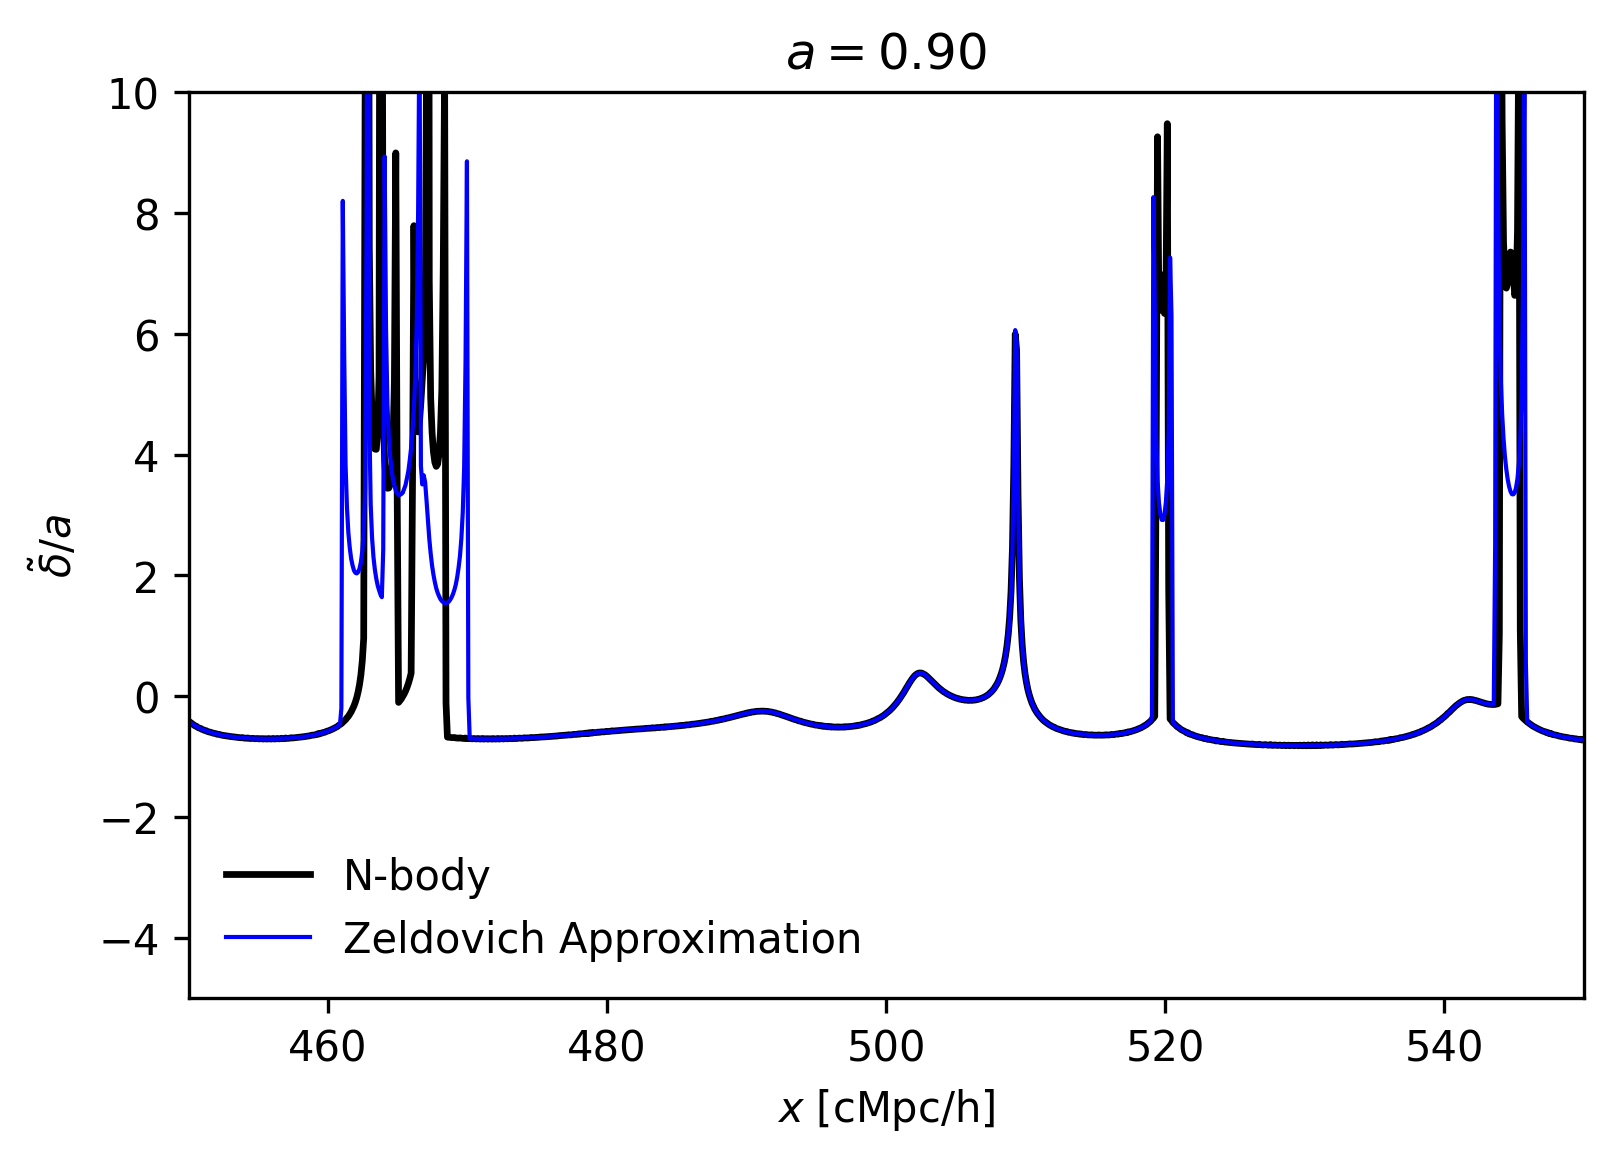

100%|█████████▉| 8995/9011 [00:46<00:00, 201.86it/s]

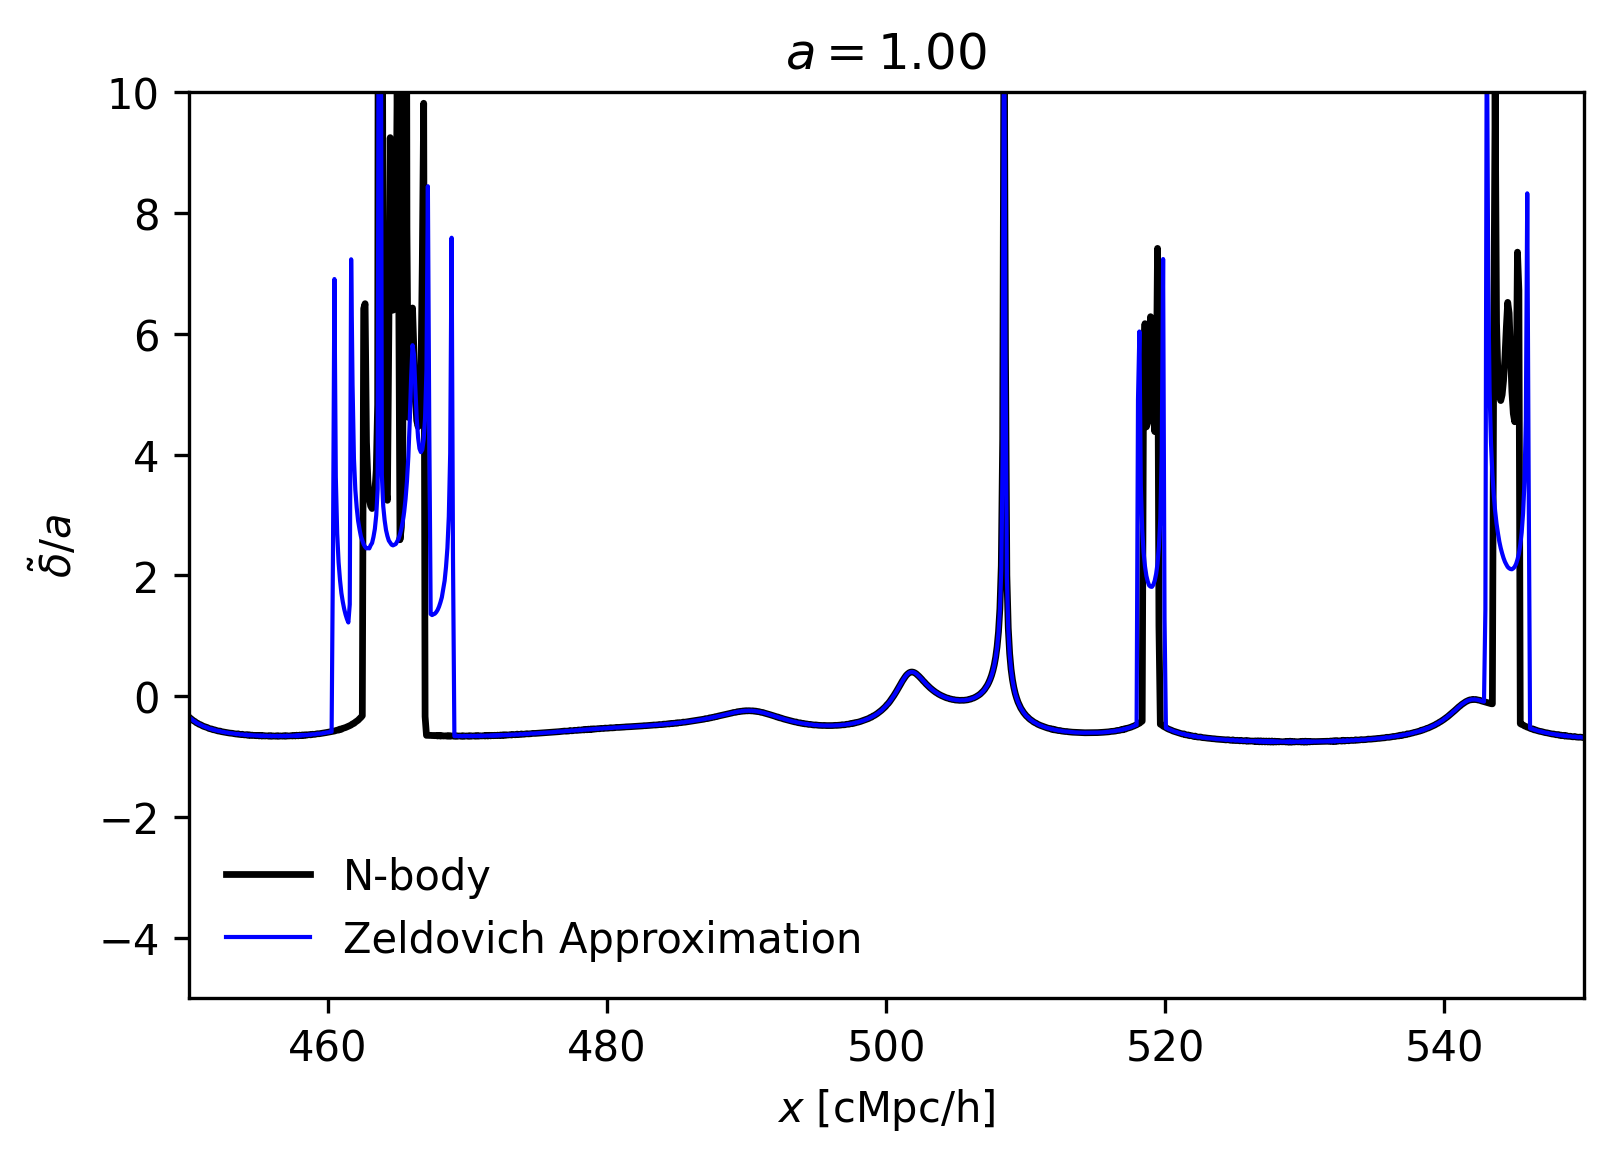

100%|██████████| 9011/9011 [00:46<00:00, 194.20it/s]


In [8]:
from tqdm import trange
for i in trange(N_steps):
    #kick
    _rho = CIC_deposit(x, Ngrid = Ngrid)
    assert(np.abs(_rho.mean()-1) < 1e-3) # a consistency check, this should be one
    _rho = _rho - _rho.mean()

    _phi = solve_poisson(_rho, curr_a)
    grad_phi = central_difference(_phi) * len(_phi)
    ap = rebin_grad_phi(x, grad_phi, Ngrid = Ngrid)
    
    p = p - np.sqrt(curr_a) * da/2 * ap
    
    #drift
    x = x + curr_a**(-3/2) * da * p
    x = array_periodic_boundary(x)

    
    #kick
    curr_a += da/2
    _rho = CIC_deposit(x, Ngrid = Ngrid)
    assert(np.abs(_rho.mean()-1) < 1e-3)
    _rho = _rho - _rho.mean()
        
    _phi = solve_poisson(_rho, curr_a)
    grad_phi = central_difference(_phi) * len(_phi)
    ap = rebin_grad_phi(x, grad_phi, Ngrid = Ngrid)
    
    p = p - np.sqrt(curr_a) * da/2 * ap

    curr_a += da/2
    
    if(i % 1000 == 0):
        # compare our density contrast with ZA
        _q, curr_s_q = s_q(curr_a)
        f_curr_s_q = interp1d(_q, curr_s_q)

        theory_x = q + f_curr_s_q(q)
        theory_x = array_periodic_boundary(theory_x)
        theory_rho = CIC_deposit(theory_x, Ngrid = Ngrid)
        assert(np.abs(theory_rho.mean()-1) < 1e-3)
        theory_rho = theory_rho - 1
        
        plt.figure(dpi = 300, facecolor = 'w')
        plt.plot(np.linspace(0,Lbox,Ngrid), _rho / curr_a, 
                 'k', lw=1.61803, label='N-body')
        plt.plot(np.linspace(0,Lbox,Ngrid), theory_rho / curr_a, 
                 'b', lw=1, label='Zeldovich Approximation')

        plt.legend(frameon=False)
        plt.ylabel(r'$\tilde\delta / a$')
        plt.xlabel(r'$ x$ [cMpc/h]')
        plt.xlim(450,550)
        plt.title(r'$a=%.2f$'%(curr_a))
        plt.ylim(-5, 10)
        plt.show()

Some commentary: we see that ZA is correct until shell crossing as expected. Qualitatively matches Fig.2 of McQuinnWhite16